# prep_data

This notebook prepares the data for the project.  This is detail beyond the scope of the project, but you're welcome to take a look!

**DO NOT RESTART AND RUN ALL!!**

Intermediate data is saved along the way in some cases.  This will greatly speed up run time to selectively run cells.


## Step 1: Get time series for incoming solar radiation

In [40]:
#=================================================================
# This first cell contains some necessary initialization commands.
#=================================================================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
import numpy as np
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

In [2]:
%%ferret
set memory /size=80000
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel*.nc")
TSERIES srb_all = file_list
sh d


currently SET data sets:
 1> srb_all (default)
 name title I J K L
 SW_TOA_DN
 All-Sky Shortwave TOA Downward 1:360 1:180 ... 1:288
 CLR_SW_SFC_DN
 Clear-Sky Shortwave Surface Dow 1:360 1:180 ... 1:288
 PRIST_SW_SFC_DN
 Pristine-Sky Shortwave Surface 1:360 1:180 ... 1:288
 SW_SFC_DN
 All-Sky Shortwave Surface Downw 1:360 1:180 ... 1:288
 SW_SFC_NET
 All-Sky Shortwave Surface Net F 1:360 1:180 ... 1:288
 SW_SFC_ALB
 All-Sky Shortwave Surface Albed 1:360 1:180 ... 1:288

In [3]:
%%ferret
!shade (sw_toa_dn[l=@AVE] - sw_sfc_dn[l=@AVE]); go fland
!plot sw_sfc_dn[x=-10,y=57]
list sw_toa_dn[x=@AVE,y=@AVE,l=@AVE]
list clr_sw_sfc_dn[x=@AVE,y=@AVE,l=@AVE]
list prist_sw_sfc_dn[x=@AVE,y=@AVE,l=@AVE]
list sw_sfc_dn[x=@AVE,y=@AVE,l=@AVE]
list sw_sfc_net[x=@AVE,y=@AVE,l=@AVE]

VARIABLE : All-Sky Shortwave TOA Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 341.8
 VARIABLE : Clear-Sky Shortwave Surface Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 256.4
 VARIABLE : Pristine-Sky Shortwave Surface Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 243.1
 VARIABLE : All-Sky Shortwave Surface Downward Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 182.1
 VARIABLE : All-Sky Shortwave Surface Net Flux (W m-2)
 FILENAME : srb_all
 LONGITUDE: 0E to 0E(360) (XYT ave)
 LATITUDE : 90S to 90N (XYT ave)
 TIME : 16-DEC-1983 12:00 to 16-DEC-2007 00:00 (XYT ave)
 159.5

Each of these shortwave fluxes gets progressively smaller
which implies that there are more and more "blocking" effects
(clouds, aerosols, etc.).  The net flux takes into account the
relatively small amount of radiative emission of the surface
due to its own temperature (and not just the amount of incident
light).  So, in this case, use the `All-Sky SW Downward flux` to
account for clouds, etc.  And you can see it's alot noisier and
smaller than the `Clear Sky SW Downward flux`.


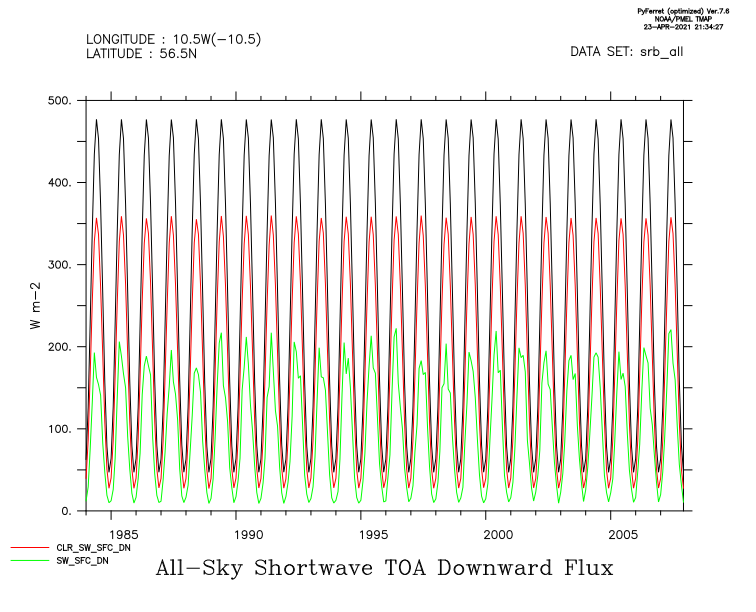

In [4]:
%%ferret
plot sw_toa_dn[x=-10,y=57]
plot /over /color=2 clr_sw_sfc_dn[x=-10,y=57]
plot /over /color=3 sw_sfc_dn[x=-10,y=57]

# Step 2: Create an incoming light climatology

So here we load each month, find the mean, and spit out the month's value.  Manually copy these values into a 2020-2021 spreadsheet for display.  Use 2020-2021 as the year for the data so it can be overlaid on the NRT data later.

In [5]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????01.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-JUL-1983 00:00 to 02-JUL-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 16.41 3.670

In [6]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????02.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-AUG-1983 00:00 to 02-AUG-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 36.66 7.252

In [7]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????03.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-AUG-1983 12:00 to 30-AUG-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 74.29 9.016

In [8]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????04.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-OCT-1983 12:00 to 30-SEP-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 137.5 12.59

In [9]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????05.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-OCT-1983 12:00 to 30-OCT-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 187.3 18.13

In [10]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????06.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-DEC-1983 12:00 to 30-NOV-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 193.3 18.95

In [11]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????07.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-DEC-1983 12:00 to 30-DEC-2007 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 168.1 11.38

In [12]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????08.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 31-JAN-1984 12:00 to 30-JAN-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 149.1 14.88

In [13]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????09.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-MAR-1984 12:00 to 01-MAR-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 97.53 8.247

In [14]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????10.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-APR-1984 12:00 to 31-MAR-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 51.59 6.929

In [15]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????11.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 02-MAY-1984 12:00 to 01-MAY-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 23.98 5.404

In [16]:
%%ferret
cancel data /all
cancel variable /all
let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_rel3.0_lpsa_monthly_????12.nc")
TSERIES srb_mon = file_list

list sw_sfc_dn[x=-10,y=57,l=@AVE],(sw_sfc_dn[x=-10,y=57,l=@VAR])^0.5

DATA SET: srb_mon
 TIME: 01-JUN-1984 12:00 to 31-MAY-2008 12:00
 Column 1: SW_SFC_DN[X=10.5W(-10.5),Y=56.5N,T=@AVE] is All-Sky Shortwave Surface Downward Flux (W m-2)
 Column 2: EX#2 is (SW_SFC_DN[X=-10,Y=57,L=@VAR])^0.5
 SW_SFC_DN EX#2
I / *: 10.27 0.7698

# Step 3: Create chlorophyll climatology




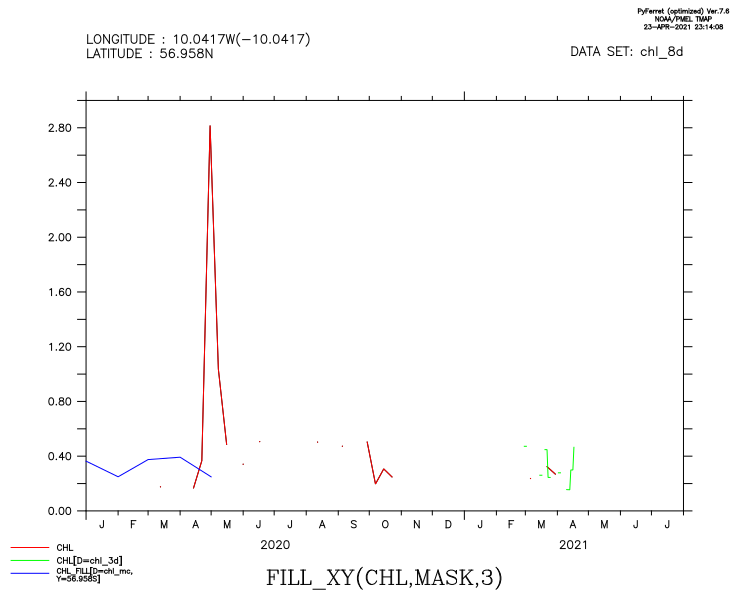

In [44]:
%%ferret
cancel variable /all
cancel data /all
set memory /size=80000
let file_list = SPAWN("ls -1 /mnt/courses/eos1505/MODIS/A*R3QL*.cdf")
TSERIES chl_3d = file_list

let file_list_2 = SPAWN("ls -1 /mnt/courses/eos1505/MODIS/A*8D*.cdf")
TSERIES chl_8d = file_list_2

let file_list_3 = SPAWN("ls -1 /mnt/courses/eos1505/MODIS/A*MC*.cdf")
TSERIES chl_mc = file_list_3

use /mnt/courses/eos1505/MODIS/A20021852021031.L3m_CU_CHL_chlor_a_9km.nc

let mask = if chlor_a[d=4,l=@AVE] gt 0 then 1 else 0

let chl_fill = fill_xy(chl,mask,3)

! As you can see below, this is really dissappointing
! data coverage, even when engaging the fill.  There
! is some kind of bug in ferret because if the filled
! data are saved, then the interpolations do end up
! in the time series (whereas when the data are not
! saved, the spatial interpolations do NOT appear in
! the time series.  Compare to the cell below.)
plot /hlimits=43458:44000 chl_fill[d=2,x=-10,y=57]
plot /over /color=2 chl[d=2,x=-10,y=57]
plot /over /color=3 chl[d=1,x=-10,y=57]
plot /over /color=4 chl_fill[d=3,x=-10,y=-57]

! Save spatially interpolated version
save /file="/mnt/courses/eos1505/MODIS/MODIS_8D.cdf" /clobber chl_fill[d=2]
save /file="/mnt/courses/eos1505/MODIS/MODIS_R3QL.cdf" /clobber chl_fill[d=1]
save /file="/mnt/courses/eos1505/MODIS/MODIS_MC.cdf" /clobber chl_fill[d=3]


In [46]:
%%ferret
cancel variables /all
cancel data /all
use /mnt/courses/eos1505/MODIS/MODIS_8D.cdf
use /mnt/courses/eos1505/MODIS/MODIS_R3QL.cdf
use /mnt/courses/eos1505/MODIS/MODIS_MC.cdf
sh d

currently SET data sets:
 1> /mnt/courses/eos1505/MODIS/MODIS_8D.cdf
 name title I J K L
 CHL_FILL FILL_XY(CHL,MASK,3) 1:4320 1:2160 ... 1:57
 
 2> /mnt/courses/eos1505/MODIS/MODIS_R3QL.cdf
 name title I J K L
 CHL_FILL FILL_XY(CHL,MASK,3) 1:4320 1:2160 ... 1:60
 
 3> /mnt/courses/eos1505/MODIS/MODIS_MC.cdf (default)
 name title I J K L
 CHL_FILL FILL_XY(CHL,MASK,3) 1:4320 1:2160 ... 1:12


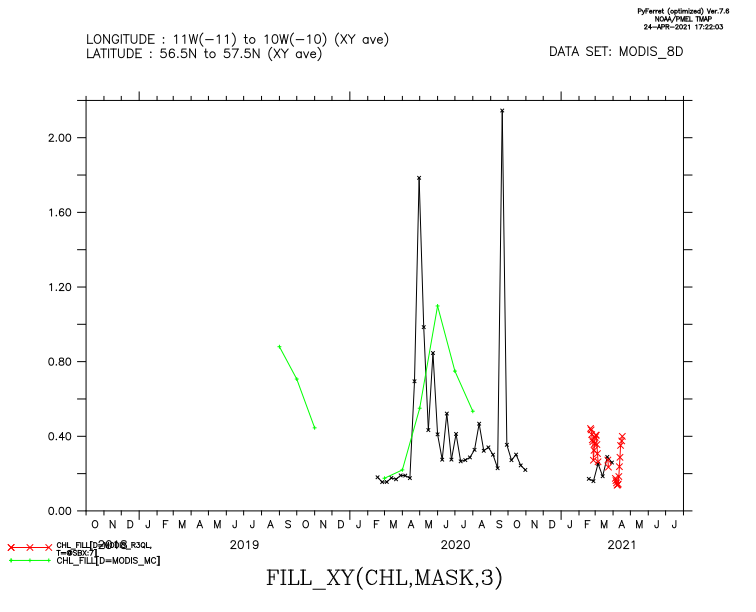

In [57]:
%%ferret
plot /hlimits=43000:44000 /d=1 /symbol=1 /line chl_fill[x=-11:-10@AVE,y=56.5:57.5@AVE]
plot /d=2 /over /symbol=2 /line chl_fill[x=-11:-10@AVE,y=56.5:57.5@AVE,l=@SBX:7]
plot /d=3 /over /symbol=3 /line chl_fill[x=-11:-10@AVE,y=56.5:57.5@AVE]
list /file=chl_8d_dt.txt /nohead /clobber chl_fill[d=1,x=-10,y=57]
list /file=chl_3d_nrt.txt /nohead /clobber chl_fill[d=2,x=-10,y=57]
!list /file=chl_clim.txt /nohead /clobber chl_fill[d=3,x=-10,y=57]

# Step 4: Create SLP climatology

From CORE2 data


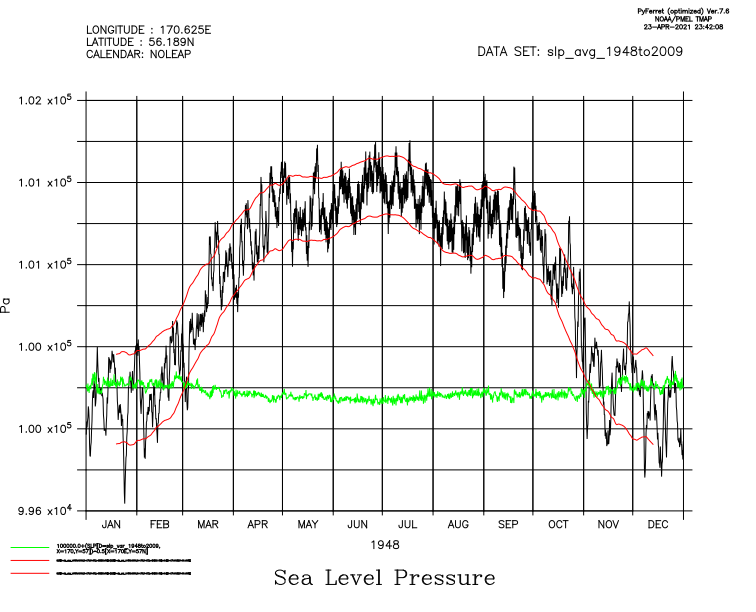

In [70]:
%%ferret
cancel variable /all
cancel data /all
use /mnt/courses/eos2585/CORE2/clims/slp_avg_1948to2009.nc
use /mnt/courses/eos2585/CORE2/clims/slp_var_1948to2009.nc
!shade slp[d=1,l=@AVE]; go fland
!plot slp[d=1,x=170,l=@AVE]
plot /graticule slp[d=1,x=170,y=57]
plot /over /color=3 100000.0+(slp[d=2,x=170,y=57])^0.5
!plot slp[d=2,x=170,y=57]
plot /over /color=2 slp[d=1,x=170,y=57,l=@SBX:149]+(slp[d=2,x=170,y=57,l=@SBX:149])^0.5
plot /over /color=2 slp[d=1,x=170,y=57,l=@SBX:149]-(slp[d=2,x=170,y=57,l=@SBX:149])^0.5
!list slp[x=170,y=57,l=@SBX:149]

# Step 5: Create MLD time series

First need to concatenate all the glider .hb files to then search for the ones that are in the region of interest.  In this case,
```bash
cat *.hb > tmp.hb
hb_extract tmp.hb -Tg-11/-9/56.5/57.5 -Tb1000/10000 > all.deep.box.hb
```

+ For sg605: 398 stations extracted   1117 stations skipped
+ For sg532: 209 stations extracted   415 stations skipped (as of April 24)

Then, we need to split all the stations keeping them separate from the coastal ocean stations and stations outside of the box of interest.  Put all the original files in the `archive` directory and then use HB3's `hb_stationsort` to split all files.  Note that file root should be p532 and the stations will be spit out quasi randomly in file name number.  Adjust file name to match convention:
```tcsh
hb_stationsort all.deep.box.hb -Np532
foreach file (  p532* )
    set new_name = `echo $file | sed 's/\.//'`
    mv $file ${new_name}.hb
end
```
Although this change is potentially unsettling because the file names no longer correspond to the dive number, having an exactly monotonically increasing series of profiles is great because now it's easy to loop over in Python.

In [1]:
#=================================
# Function to find the mixed layer
# depth (MLD) based on the depth
# of first occurance of a density
# difference greater than s0_thresh
# (the threshold density difference).
def find_mld(de,s0,s0_thresh):
    # Find the difference with the surface
    # density.  Since bubbles at the surface
    # can cause bad density values at the
    # very top of the water column, find the
    # minimum density of the profile after
    # ignoring all the NaN (not a number)
    # placeholders for missing/bad data.
    ds0 = s0-s0[~np.isnan(s0)].min()
    
    # Find all the values that are right at
    # and below the MLD.  Select the single
    # value at the MLD by taking the minimum
    # depth and density.
    return de[ds0 > s0_thresh].min(), s0[ds0 > s0_thresh].min()

In [31]:
# Get time series for MLD for sg605 (398 dives) and sg532 (209+ dives)
import numpy as np
import load_glider_data as sg
import datetime

# Initialize the storage
ymdds = []

# sg605
dive_num = 398
list_dives = np.linspace(1,dive_num,dive_num)

for dive in list_dives:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('605',str(int(dive)).zfill(4))
    de_mld, s0_mld = find_mld(de,s0,0.02)
    
    ymdds.append([year, month, day, de_mld, s0_mld])
    
# sg532
dive_num = 209
list_dives = np.linspace(1,dive_num,dive_num)

for dive in list_dives:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('532',str(int(dive)).zfill(4))
    de_mld, s0_mld = find_mld(de,s0,0.02)
    
    ymdds.append([year, month, day, de_mld, s0_mld])
    
# Convert to numpy array:
ymdds_np = np.asarray(ymdds)
ymd = ymdds_np[:,0:3].astype(int)

# Convert to datetimes
mld_dates = [datetime.datetime(*dd) for dd in ymd]
mld_data = ymdds_np[:,3]


# Step 6: MLD climatology

Jul 25.0 26.7073
Aug 25.0 26.6651
Sep 35.0 26.716
Oct 55.0 26.9005
Nov 115.0 27.0826
Dec 255.0 27.1965
Jan 495.0 27.2946
Feb 705.0 27.3417
Mar 705.0 27.3935
Apr 395.0 27.343
May 35.0 27.1997
Jun 25.0 26.9425


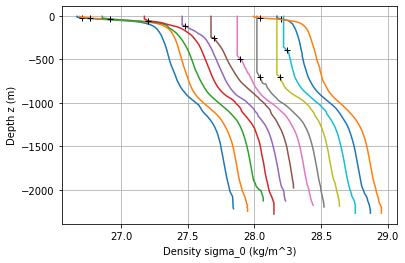

In [63]:
# Monthly climatology waterfall plot to describe MLD (for use in class)

fig, ax = plt.subplots()

mons = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

s0_offset = 0.0
ds0 = 0.1

for mon in mons:
    [lon, lat, de, te, sa, th, s0, year, month, day] = sg.load_hb_profile('000',mon)
    ax.plot(s0+s0_offset,-1.0*de)
    
    de_mld, s0_mld = find_mld(de,s0,0.02)
    ax.plot(s0_mld+s0_offset,-1.0*de_mld,'k+')
    
    print(mon, de_mld, s0_mld)

    s0_offset = s0_offset + ds0
    
ax.set_xlabel('Density sigma_0 (kg/m^3)')
ax.set_ylabel('Depth z (m)')
ax.grid()

# Step 7: Putting it all together

There's no need for the SLP time series.  I don't see any major destratifying storm events in the time series so it will be a stretch to interpret.  It also seems that the MLD was not as deep this year, perhaps due to weaker storms, but since it's a minor shift, unlikely to see that effect in surface CHL.  Drop that component.

The remaining data to join are:
+ MLD clim ---------------------> DONE! [m, kg/m3]
+ MLD 2020-2021 + NRT updates
+ CHL 2020-2021 8D
+ CHL 2021 R3QL
+ CHL clim ---------------------> DONE! [mg/kg]
+ PAR clim ---------------------> DONE! [W/m^2, variance]

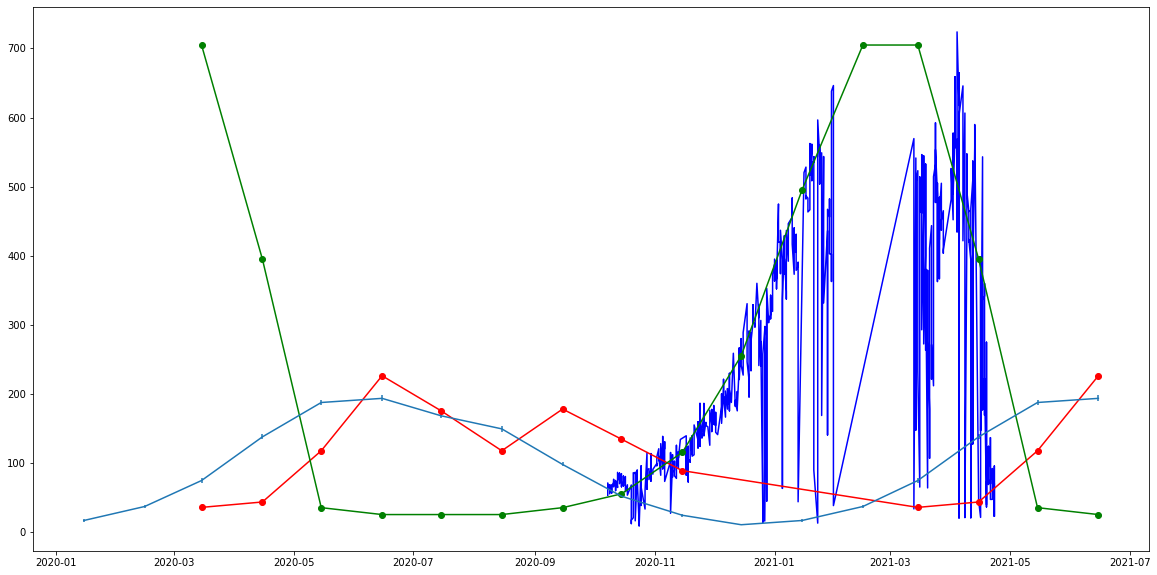

In [68]:
import matplotlib.pyplot as plt

# MLD 2020-2021
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(mld_dates,mld_data,'b')

# Light climatology
light = np.loadtxt('light_clim.csv',delimiter=',')
ymd = light[:,0:3].astype(int)
light_dates = [datetime.datetime(*dd) for dd in ymd]
light_wpm3_avg = light[:,3]
light_wpm3_std = np.sqrt(light[:,4])
ax.errorbar(light_dates,light_wpm3_avg,yerr=light_wpm3_std)

# CHL climatology
chl_clim = np.loadtxt('chl_clim.txt',delimiter=',')
ymd = chl_clim[:,0:3].astype(int)
chl_clim_data = chl_clim[:,3]
chl_clim_dates = [datetime.datetime(*dd) for dd in ymd]
ax.plot(chl_clim_dates,chl_clim_data*200,'ro-')

# MLD climatology
mld_clim = np.loadtxt('mld_clim.txt',delimiter=',')
ymd = mld_clim[:,0:3].astype(int)
mld_clim_data = mld_clim[:,3]
mld_clim_dates = [datetime.datetime(*dd) for dd in ymd]
ax.plot(mld_clim_dates,mld_clim_data,'go-')